In [9]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
data = breast_cancer["data"]
target = breast_cancer["target"]

In [4]:
standard_scaler = StandardScaler()
data = standard_scaler.fit_transform(data)

In [5]:
from sklearn.decomposition import PCA
pc = PCA(n_components = 2)
data_projected = pc.fit_transform(data)

In [6]:
data_projected = pd.DataFrame(data_projected)
data_projected = data_projected.rename(columns ={0:"x",1:"y"})
data_projected["target"] = target.astype(str)


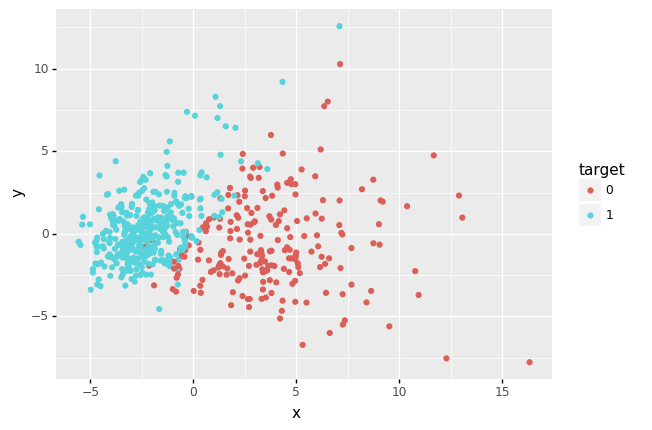

<ggplot: (8755014124918)>

In [7]:
ggplot(data_projected) + geom_point(aes( x = "x",y = "y",color = "target"))

In [10]:
svc = SVC(kernel = "rbf")
svc.fit(data_projected[["x","y"]],data_projected["target"])
data_projected["predicted_target"]  = svc.predict(data_projected[["x","y"]])

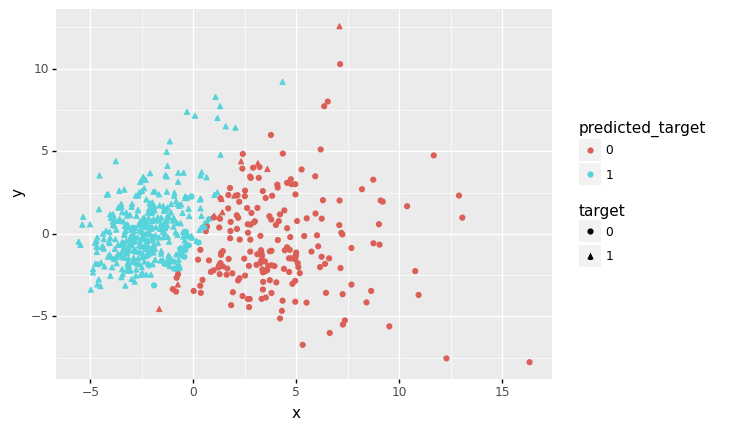

<ggplot: (8755009772897)>

In [12]:
ggplot(data_projected) + geom_point(aes( x = "x",y = "y",color = "predicted_target",shape = "target"))

In [11]:
params = {"pca__n_components": [2,3,4,5,6,7],"svc__kernel":["linear","rbf"]}
steps = [('scaler',StandardScaler()),('pca',PCA(n_components = 2)),('svc',SVC())]
pipeline = Pipeline(steps)

In [17]:
def custom_score(y_true,y_pred):
    recall = np.sum((y_true == y_pred) &(y_true == 1)) / np.sum(y_true ==1)
    precision = np.sum((y_true == y_pred) &(y_true == 1)) / np.sum(y_pred ==1)
    score = 2*(recall*precision)/ (recall + precision)
    return score

In [18]:
from sklearn.metrics import make_scorer
custom_score_ = make_scorer(custom_score, greater_is_better=True)

In [23]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(cv=10,estimator=pipeline,param_grid=params,scoring="f1")
gs.fit(data,target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('svc', SVC())]),
             param_grid={'pca__n_components': [2, 3, 4, 5, 6, 7],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='f1')

In [20]:
gs.best_score_

0.9777660501463432

In [24]:
gs.best_score_

0.9777660501463432

In [28]:
pipeline.fit(X_train,target_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc', SVC())])

In [33]:
np.sum(pipeline.predict(X_train) == target_train) / len(X_train)

0.945054945054945

In [34]:
np.sum(pipeline.predict(X_test) == target_test) / len(X_test)

0.956140350877193

In [58]:
data_projected.loc[data_projected["target"]!=data_projected["predicted_target"],"error"] = 1
data_projected.loc[data_projected["target"]==data_projected["predicted_target"],"error"] = 0

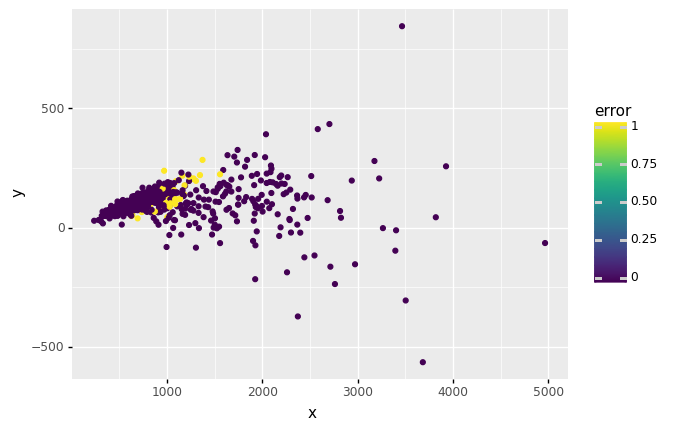

<ggplot: (8790941589655)>

In [59]:
ggplot(data_projected) + geom_point(aes( x = "x",y = "y",color = "error"))

In [116]:
from pandas_profiling import ProfileReport
df = pd.DataFrame(data[:,:10])
df["target"] = target.astype(str)
profile = ProfileReport(pd.DataFrame(df),config_file="my_config.yaml")
profile